In [2]:
import anfis
import membership.mfDerivs
import membership.membershipfunction
import numpy as np
import matplotlib.pyplot as plt

ts = np.load(
    "C:/Users/Esteban/Documents/Escuela/Robotica/Fuzzy/anfis/anfis/datos.npy")

# Normalize
#ts = ts / ts.max(axis=0)

# Datos

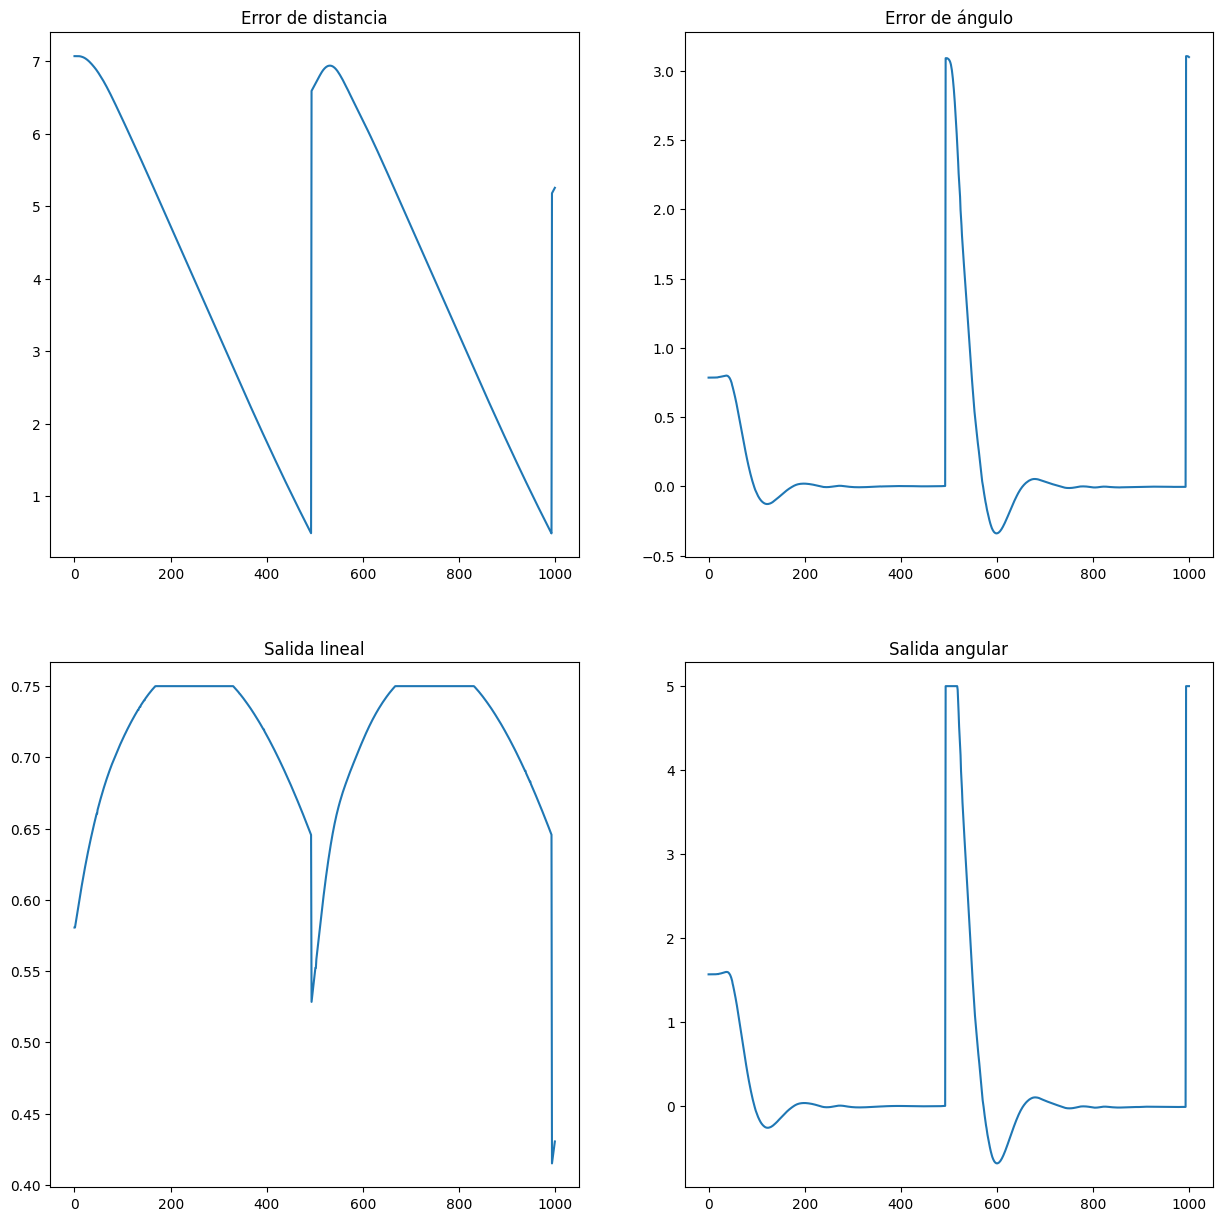

In [3]:


plt.subplots_adjust()
plt.subplot(2, 2, 1)
plt.plot(ts[:, 0])
plt.title("Error de distancia")

plt.subplot(2, 2, 2)
plt.plot(ts[:, 1])
plt.title("Error de ángulo")

plt.subplot(2, 2, 3)
plt.plot(ts[:, 2])
plt.title("Salida lineal")

plt.subplot(2, 2, 4)
plt.plot(ts[:, 3])
plt.title("Salida angular")


plt.gcf().set_size_inches(15, 15)
plt.show()

# Generador de pruebas

In [4]:
def test(X, Y, mfs, type, epochs=20, print_mfs = False, k = 0.0005):
	nx = np.linspace(np.min(X), np.max(X), mfs)
	ny = np.linspace(min(Y), max(Y), mfs)

	mfx = []
	mfy = []

	for i in range(mfs):
		if type == "gaussmf":
			mfx.append(['gaussmf', {'mean': np.round(nx[i], 1),
					'sigma': np.round((np.max(X)-np.min(X))/2, 1)}])
			mfy.append(['gaussmf', {'mean': np.round(ny[i], 1),
					'sigma': np.round((max(Y)-min(Y))/2, 1)}])
		elif type == "gbellmf":
			mfx.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(nx[i], 1)}])
			mfy.append(['gbellmf', {'a': 1, 'b': 1, 'c': np.round(ny[i], 1)}])
		elif type == "sigmf":
			mfx.append(['sigmf', {'b': np.round(nx[i], 1), 'c': 1}])
			mfy.append(['sigmf', {'b': np.round(ny[i], 1), 'c': 1}])
			
	mf = [mfx, mfy]

	mfc = membership.membershipfunction.MemFuncs(mf)

	anf = anfis.ANFIS(X, Y, mfc)

	anf.trainHybridJangOffLine(epochs=epochs, k = k, print_mfs = print_mfs)

	print("Plotting errors")
	anf.plotErrors()
	print("Plotting results")
	anf.plotResults()


# Controlador lineal

In [5]:
X = ts[:, 0:2]
Y = ts[:, 2]

## Gaussian MFs

### 3 MFs

1) MSEe: 0.02330161404802964
2) MSEe: 0.023292413970315173
3) MSEe: 0.023283237454794183
4) MSEe: 0.023274080211070816
5) MSEe: 0.023264021543830254
6) MSEe: 0.02325296657215755
7) MSEe: 0.02324080649084611
8) MSEe: 0.023227414710411468
9) MSEe: 0.02321264148863011
10) MSEe: 0.023196306564199274
11) MSEe: 0.023178189543622423
12) MSEe: 0.023158018797054418
13) MSEe: 0.023135463318949084
14) MSEe: 0.02311014333851688
15) MSEe: 0.023081709726517376
16) MSEe: 0.023050145240677618
17) MSEe: 0.023016756216807786
18) MSEe: 0.02298732332366978
19) MSEe: 0.022982243423586478
Min error: 0.022982243423586478 at epoch 19
Plotting errors


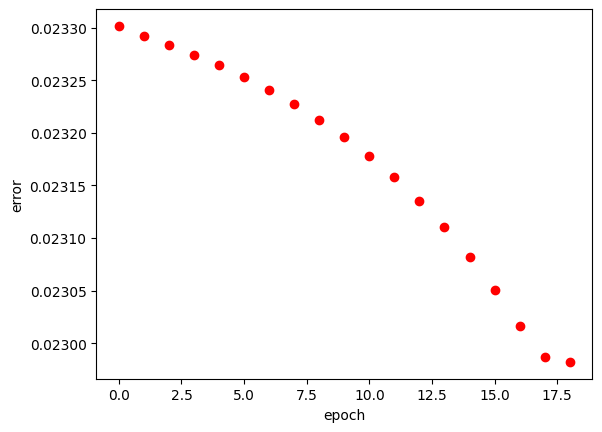

Plotting results


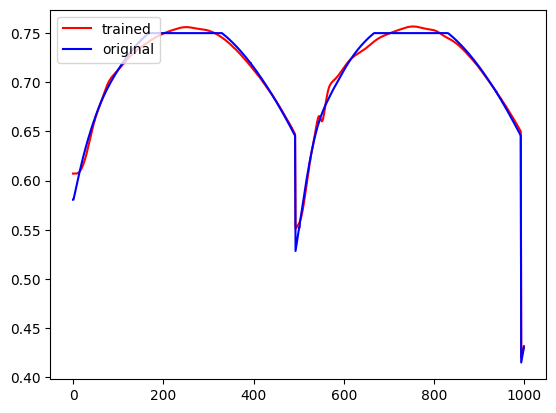

In [5]:
test(X, Y, 3, "gaussmf", k = 0.0008)

### 4 MFs

1) MSEe: 0.014861677885648399
2) MSEe: 0.014857943352426715
3) MSEe: 0.014853684604540361
4) MSEe: 0.014848735872211718
5) MSEe: 0.014842276506030164
6) MSEe: 0.01483344563160004
7) MSEe: 0.014820794185627918
8) MSEe: 0.014804394077146184
9) MSEe: 0.014849067426178243
10) MSEe: 0.01437649369934366
11) MSEe: 0.014469521915625307
12) MSEe: 0.014524595957557849
13) MSEe: 0.014548379053683341
14) MSEe: 0.014549580652967317
15) MSEe: 0.014535493914631652
16) MSEe: 0.014511483823832867
17) MSEe: 0.014481362189051031
18) MSEe: 0.014444422564567535
19) MSEe: 0.014402221668954638
Min error: 0.01437649369934366 at epoch 10
Plotting errors


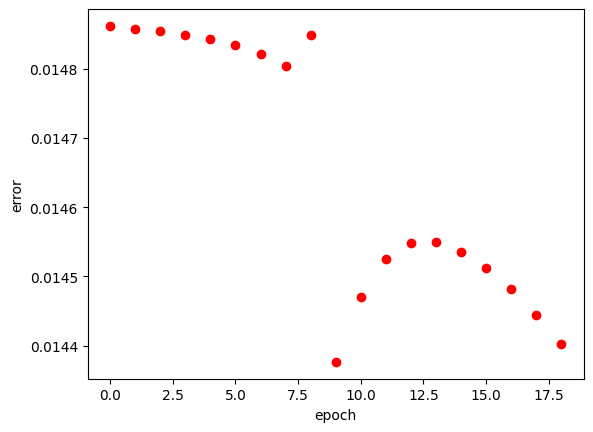

Plotting results


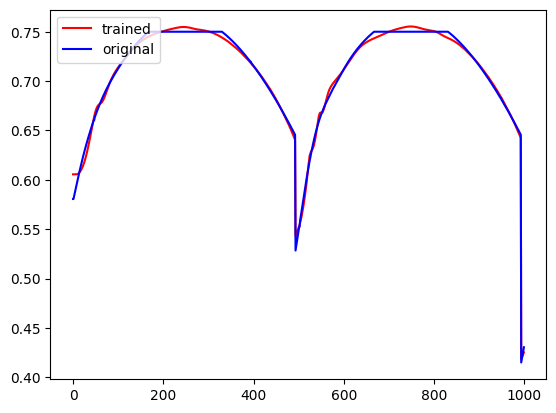

0.01405340566021459

In [6]:
test(X, Y, 4, "gaussmf")

### 5 MFs

1) MSEe: 0.014490091500077996
2) MSEe: 0.01448667364926133
3) MSEe: 0.014483889802845096
4) MSEe: 0.014481810324908494
5) MSEe: 0.014480431681444406
6) MSEe: 0.014480171971900657
7) MSEe: 0.014481730516094367
8) MSEe: 0.014485814800726549
9) MSEe: 0.014493405399915622
10) MSEe: 0.014505787121679613
11) MSEe: 0.01452395016670418
12) MSEe: 0.014546857852903156
13) MSEe: 0.014568001983897037
14) MSEe: 0.014571498774919455
15) MSEe: 0.014535744985604726
16) MSEe: 0.014458060091075151
17) MSEe: 0.014386644577571227
18) MSEe: 0.014447465928628462
19) MSEe: 0.014962244945041427
Min error: 0.014386644577571227 at epoch 17
Plotting errors


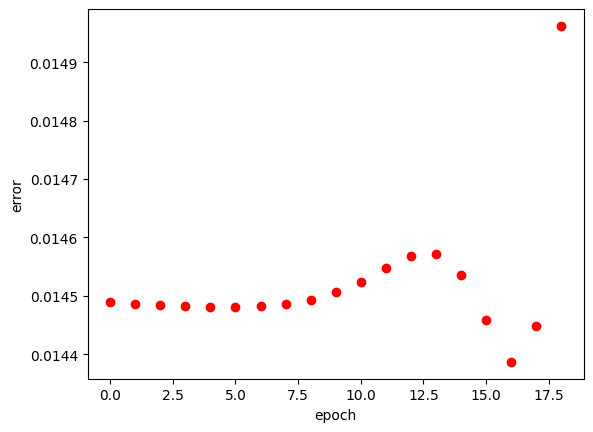

Plotting results


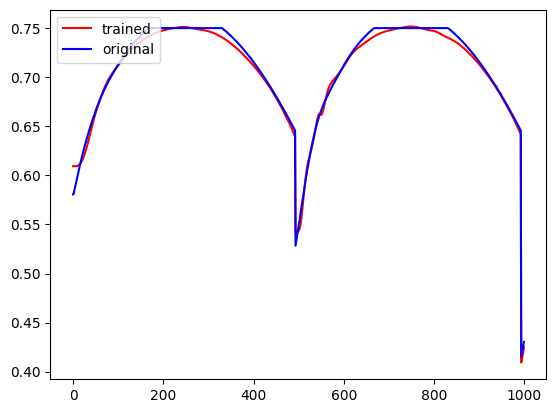

0.014419683086966974

In [10]:
test(X, Y, 5, "gaussmf", k = 0.001)


## Generalized Bell MFs

### 3 MFs

1) MSEe: 0.032524631939414045
2) MSEe: 0.032468865296084046
3) MSEe: 0.032407030205016146
4) MSEe: 0.032330798639498386
5) MSEe: 0.03222560300430693
6) MSEe: 0.03208323233722099
7) MSEe: 0.031901468183842846
8) MSEe: 0.031687374010676186
9) MSEe: 0.031457938586177514
10) MSEe: 0.0312372377825403
11) MSEe: 0.03105087710433266
12) MSEe: 0.030919697556478158
13) MSEe: 0.030855059371773554
14) MSEe: 0.030857367079423458
15) MSEe: 0.030910641645326767
16) MSEe: 0.030993791466478945
17) MSEe: 0.031092350248243222
18) MSEe: 0.03119722424424408
19) MSEe: 0.031303035098701554
Min error: 0.030855059371773554 at epoch 13
Plotting errors


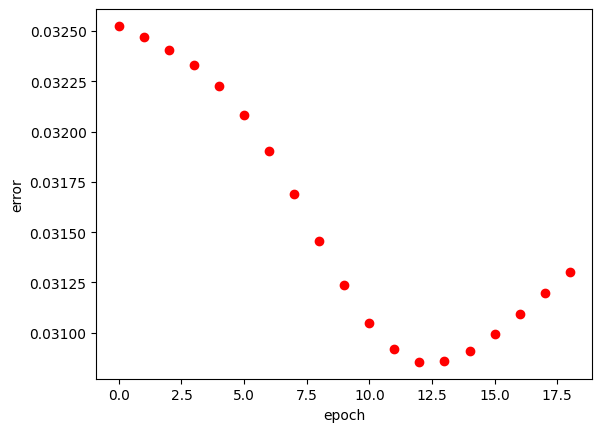

Plotting results


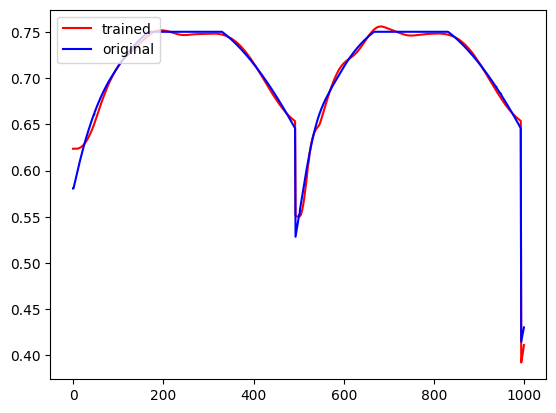

In [14]:
test(X, Y, 3, "gbellmf", k=0.0005)


### 4 MFs

1) MSEe: 0.02501324316191593
2) MSEe: 0.024838265604727627
3) MSEe: 0.024643899484853755
4) MSEe: 0.024427031448122374
5) MSEe: 0.02416010014467962
6) MSEe: 0.023830416416827597
7) MSEe: 0.023425273716640566
8) MSEe: 0.022935609500049015
9) MSEe: 0.0223622458654722
10) MSEe: 0.021724110932450025
11) MSEe: 0.021065425964213035
12) MSEe: 0.020456462673247765
13) MSEe: 0.019983050421746883
14) MSEe: 0.019723928414259958
15) MSEe: 0.019717197030012856
16) MSEe: 0.019924880124558376
17) MSEe: 0.02021070118950426
18) MSEe: 0.02048510057255495
19) MSEe: 0.02072184738689521
Min error: 0.019717197030012856 at epoch 15
Plotting errors


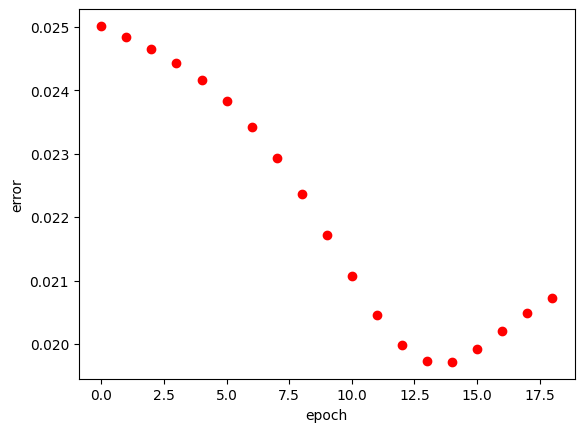

Plotting results


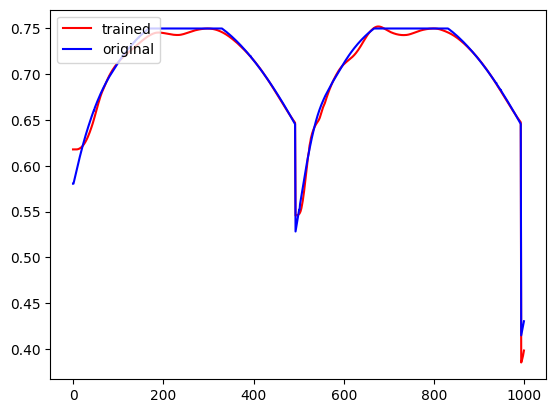

In [18]:
test(X, Y, 4, "gbellmf", k = 0.001)

### 5 MFs

1) MSEe: 0.020412781216759976
2) MSEe: 0.01974426245503629
3) MSEe: 0.019760394728998047
4) MSEe: 0.01898240945352169
5) MSEe: 0.016305154750491404
6) MSEe: 0.01300241310706199
7) MSEe: 0.012985580877091445
8) MSEe: 0.012723672486545537
9) MSEe: 0.01219476191718031
10) MSEe: 0.011714508365273367
11) MSEe: 0.011660562391570926
12) MSEe: 0.011227011361514038
13) MSEe: 0.01072898498638969
14) MSEe: 0.010245960342908323
15) MSEe: 0.009773657666245751
16) MSEe: 0.009266481999603032
17) MSEe: 0.008462877518494527
18) MSEe: 0.018088742898411666
19) MSEe: 0.012404985656907917
Min error: 0.008462877518494527 at epoch 17
Plotting errors


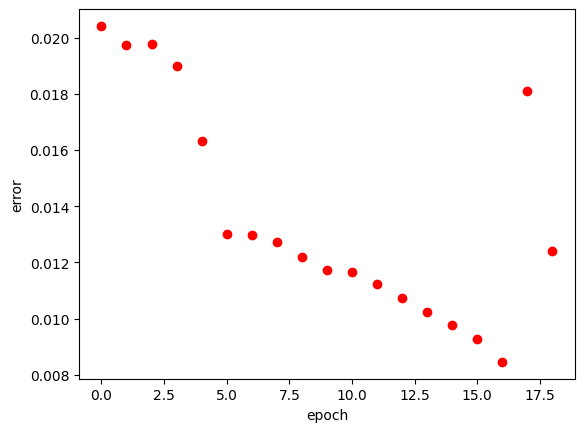

Plotting results


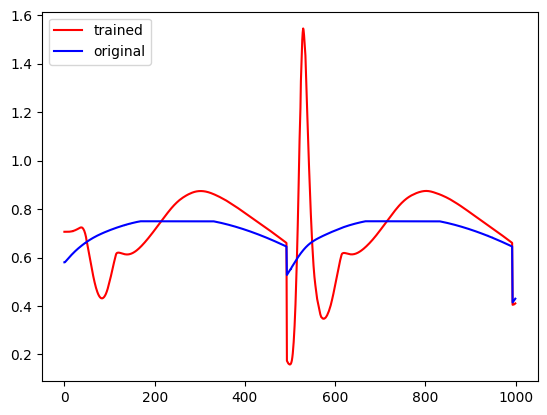

In [6]:
test(X, Y, 5, "gbellmf", k = 0.1)

## Sigmoid MFs

### 3 MFs

1) MSEe: 0.05012004810547952
2) MSEe: 0.04902196073468877
3) MSEe: 0.04812869677305007
4) MSEe: 0.04740019287572858
5) MSEe: 0.046756520693908045
6) MSEe: 0.04621684535269266
7) MSEe: 0.0458017288744456
8) MSEe: 0.04552626777952408
9) MSEe: 0.04538679369329909
10) MSEe: 0.045348305281002504
11) MSEe: 0.04535596935527755
12) MSEe: 0.04536753859736933
13) MSEe: 0.045369097058265126
14) MSEe: 0.04536100606241976
15) MSEe: 0.045346291037127784
16) MSEe: 0.04532775777422422
17) MSEe: 0.04530546290467491
18) MSEe: 0.045280803956927275
19) MSEe: 0.045255259289454494
Min error: 0.045255259289454494 at epoch 19
Plotting errors


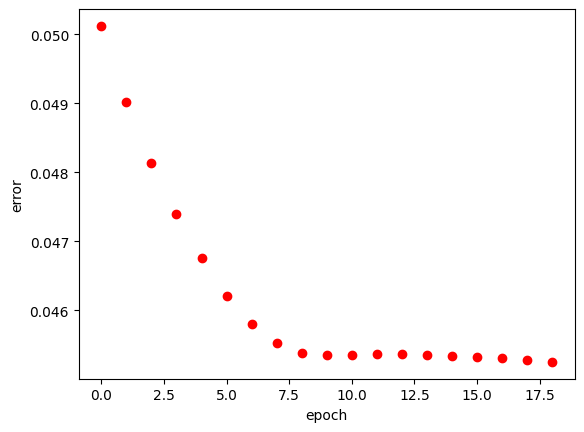

Plotting results


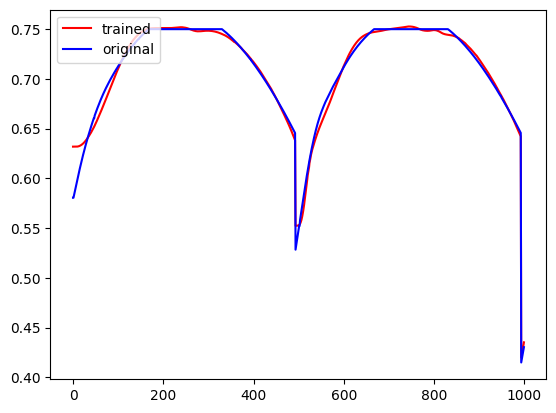

In [8]:
test(X, Y, 3, "sigmf", k = 0.1)

### 4 MFs

1) MSEe: 0.04602550183546697
2) MSEe: 0.04421001823010426
3) MSEe: 0.042816960845295286
4) MSEe: 0.04157829894972623
5) MSEe: 0.04037703401101268
6) MSEe: 0.03924565432905988
7) MSEe: 0.03822387048618903
8) MSEe: 0.037355995655878126
9) MSEe: 0.036684233083739484
10) MSEe: 0.03623289903313193
11) MSEe: 0.03598598376286834
12) MSEe: 0.03588272732419914
13) MSEe: 0.035852250339511955
14) MSEe: 0.0358495352640739
15) MSEe: 0.035856227149436676
16) MSEe: 0.035865493535682726
17) MSEe: 0.03587513092625432
18) MSEe: 0.03586538004519366
19) MSEe: 0.035875017359152814
Min error: 0.0358495352640739 at epoch 14
Plotting errors


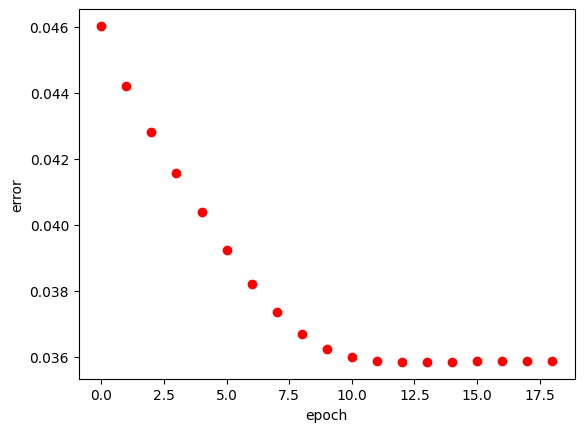

Plotting results


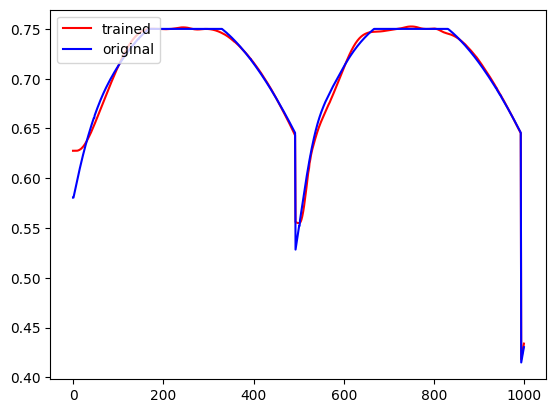

In [13]:
test(X, Y, 4, "sigmf", k = 0.1)

### 5 MFs

1) MSEe: 0.0432071490068523
2) MSEe: 0.035665565277699166
3) MSEe: 0.03432165465049972
4) MSEe: 0.03305050208133588
5) MSEe: 0.03173725940049202
6) MSEe: 0.03039619786408644
7) MSEe: 0.029045184907411065
8) MSEe: 0.02770563906542136
9) MSEe: 0.026402214982585482
10) MSEe: 0.02516218981416061
11) MSEe: 0.024014603503732627
12) MSEe: 0.022989373124464415
13) MSEe: 0.022116866713802984
14) MSEe: 0.021428438210277345
15) MSEe: 0.020955326794164248
16) MSEe: 0.020703043514861505
17) MSEe: 0.020550551407529614
18) MSEe: 0.020217677247756537
19) MSEe: 0.022732120293530503
Min error: 0.020217677247756537 at epoch 18
Plotting errors


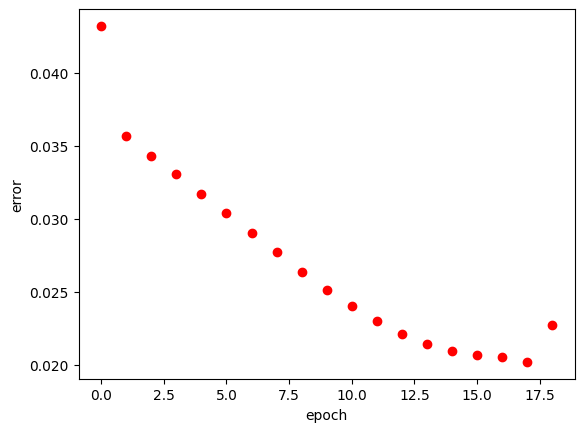

Plotting results


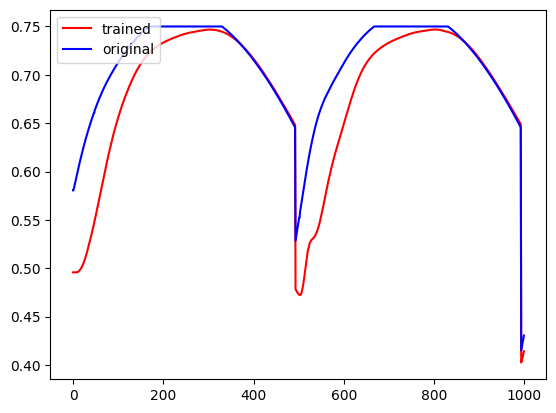

In [15]:
test(X, Y, 5, "sigmf", k = 0.1)


# Controlador Angular

In [ ]:
X = ts[:, 0:2]
Y = ts[:, 3]

## Gaussian MFs

### 3 MFs

In [ ]:
test(X, Y, 3, "gaussmf")

current error: 0.02330161404802964
current error: 0.02318400265885743


KeyboardInterrupt: 

### 4 MFs

current error: 0.1663505335005067
current error: 0.16532554060167093
current error: 0.16437045652951093
current error: 0.1634781741583748
current error: 0.16256054312761797
current error: 0.16162066256511265
current error: 0.16066193028917958
current error: 0.1596879713760943
current error: 0.15870254828567804
current error: 0.15770945268594946
current error: 0.1567123799185129
current error: 0.1557147880776224
current error: 0.1547197449919468
current error: 0.15372976803403426
current error: 0.15274666364690265
current error: 0.151771375763715
current error: 0.15080385494411355
current error: 0.14984296326029806
current error: 0.1488864342161592
Plotting errors


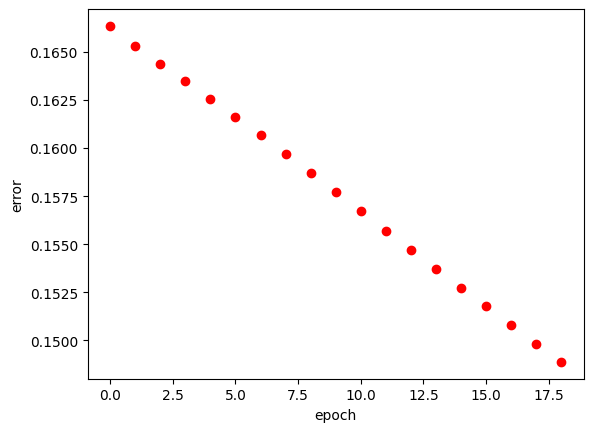

Plotting results


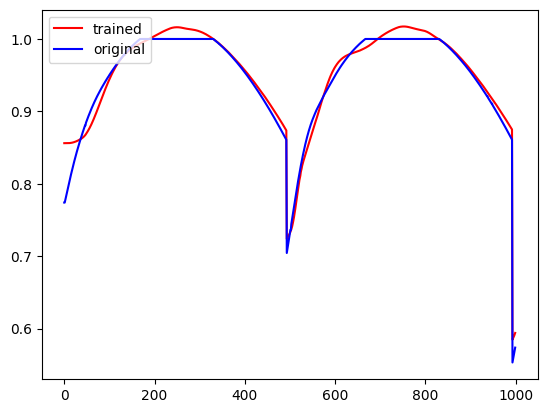

In [ ]:
test(X, Y, 4, "gaussmf")


### 5 MFs

current error: 0.16305479808035572
current error: 0.1622030904015088
current error: 0.1614049172660872
current error: 0.1606552331435479
current error: 0.15988032517468836
current error: 0.15908246799232956
current error: 0.15826423883711627
current error: 0.1574284701450198
current error: 0.15657818532962686
current error: 0.15571651687941518
current error: 0.15484660627008517
current error: 0.15397148566382268
current error: 0.153093941995371
current error: 0.15221636494604004
current error: 0.15134058168458286
current error: 0.15046768342135478
current error: 0.14959785220890026
current error: 0.1487302015447365
current error: 0.1478626515999672
Plotting errors


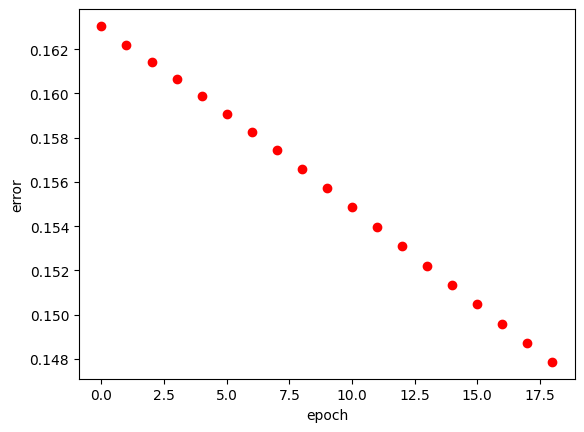

Plotting results


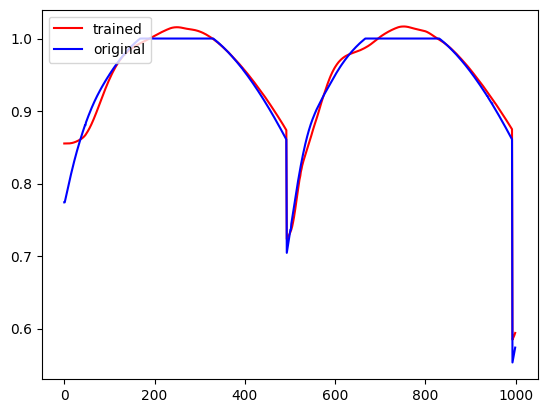

In [ ]:
test(X, Y, 5, "gaussmf")


## Generalized Bell MFs

### 3 MFs

In [ ]:
test(X, Y, 3, "gbellmf")


current error: 0.0689597372086955
current error: 0.06955173822900709
current error: 0.07039794865142929
current error: 0.07177848544518381
current error: 0.07409515474529983
current error: 0.07774142853612565
current error: 0.08294309104217798


KeyboardInterrupt: 

### 4 MFs

In [ ]:
test(X, Y, 4, "gbellmf")

### 5 MFs

In [ ]:
test(X, Y, 5, "gbellmf")

current error: 0.020412781216759976
current error: 0.016031447369598228


KeyboardInterrupt: 

## Sigmoid MFs

### 3 MFs

current error: 0.3733242796093228
current error: 0.3666529129219225
current error: 0.3599686502847712
current error: 0.35328077553366743
current error: 0.34594245810094104
current error: 0.33789137545784387
current error: 0.32904475727962845
current error: 0.31928020565205684
current error: 0.30839733242848033
current error: 0.29603449540828897
current error: 0.2814559180111668
current error: 0.2628125856805966
current error: 0.23219121359593642
current error: 0.20400205384534997
current error: 0.1979831574112374
current error: 0.1932145339335944
current error: 0.18921648831941512
current error: 0.1857439851828657
current error: 0.18265155484605583
Plotting errors


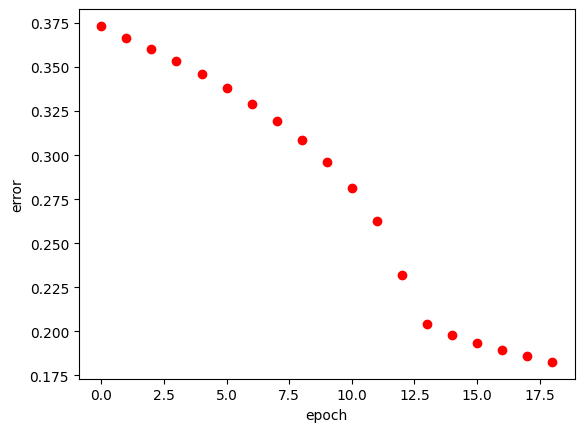

Plotting results


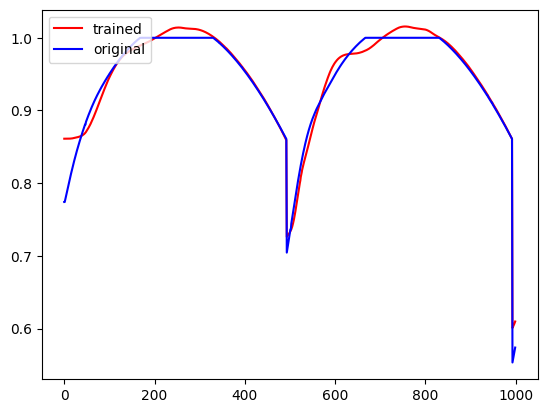

In [ ]:
test(X, Y, 3, "sigmf")

### 4 MFs

current error: 0.567236887750423
current error: 0.5543258199903849
current error: 0.5412624706486961
current error: 0.528079687372169
current error: 0.5135099702495776
current error: 0.4974275493980944
current error: 0.47967574396953705
current error: 0.46002455168125655
current error: 0.43806404004364347
current error: 0.41290242164905466
current error: 0.3820495916661159
current error: 0.3335873038835927
current error: 0.27583665934689255
current error: 0.265722343055708
current error: 0.25697812654843355
current error: 0.24916884795419245
current error: 0.24205746503596184
current error: 0.23549883121507315
current error: 0.22939663471294025
Plotting errors


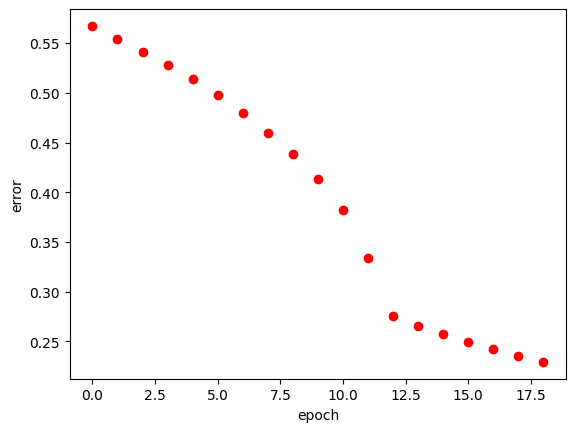

Plotting results


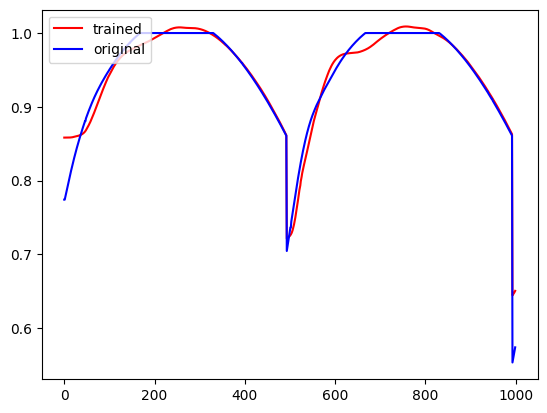

In [ ]:
test(X, Y, 4, "sigmf")

### 5 MFs

current error: 0.7176921144010564
current error: 0.702220445495394
current error: 0.6863183608133048
current error: 0.6700019837936229
current error: 0.6516394787175045
current error: 0.6309469305390832
current error: 0.6075617391370746
current error: 0.5809657013919114
current error: 0.550278608304073
current error: 0.513581550159494
current error: 0.4645942769513739
current error: 0.32730009594823906
current error: 0.3194249183159928
current error: 0.3117782254844646
current error: 0.3043245722560842
current error: 0.2970406643669921
current error: 0.2899119741624408
current error: 0.282930421095435
current error: 0.276092680578146
Plotting errors


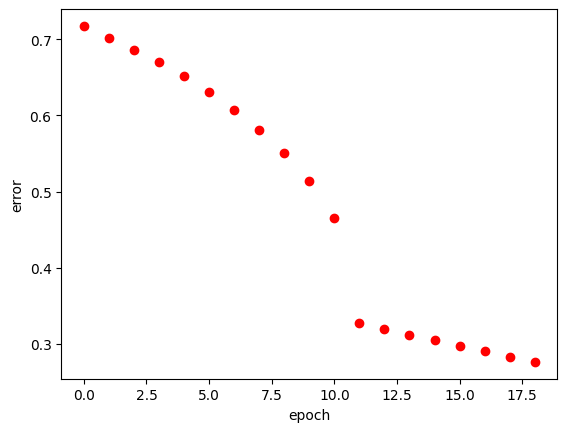

Plotting results


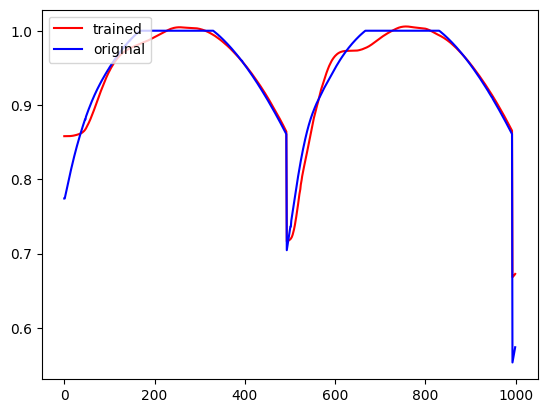

In [ ]:
test(X, Y, 5, "sigmf")


# Análisis de resultados

In [16]:
test(X, Y, 5, "gbellmf", epochs = 17, k = 0.1)


1) MSEe: 0.020412781216759976
